In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset (make sure the file path is correct)
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())



Dataset Shape: (1025, 14)
Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


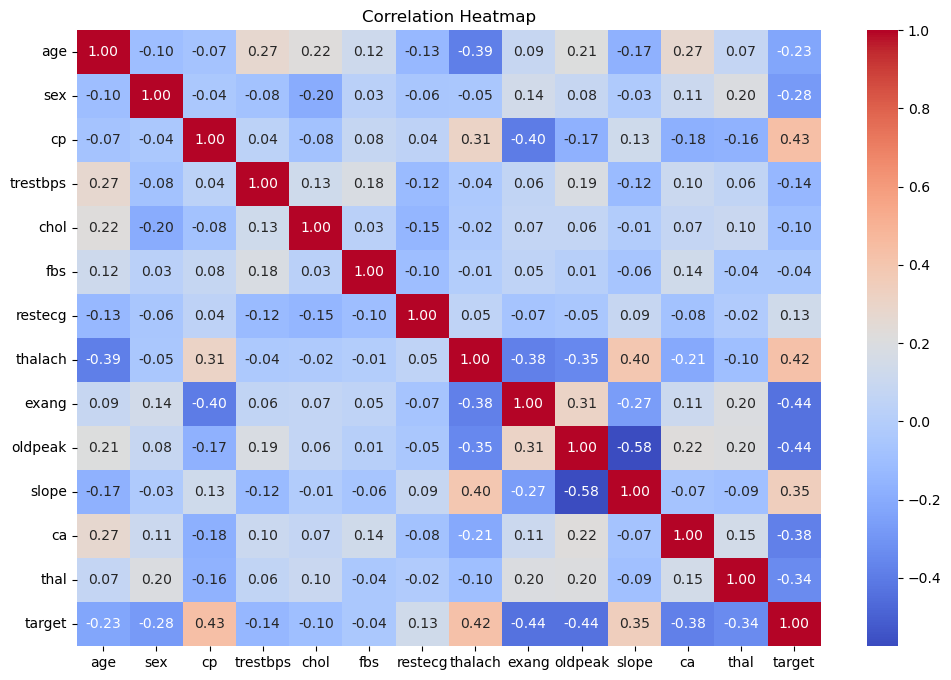

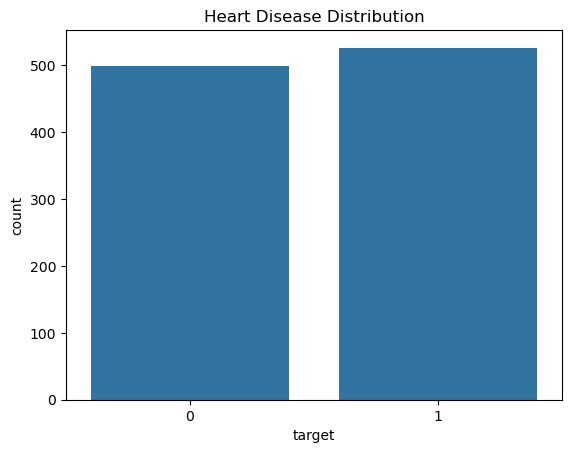

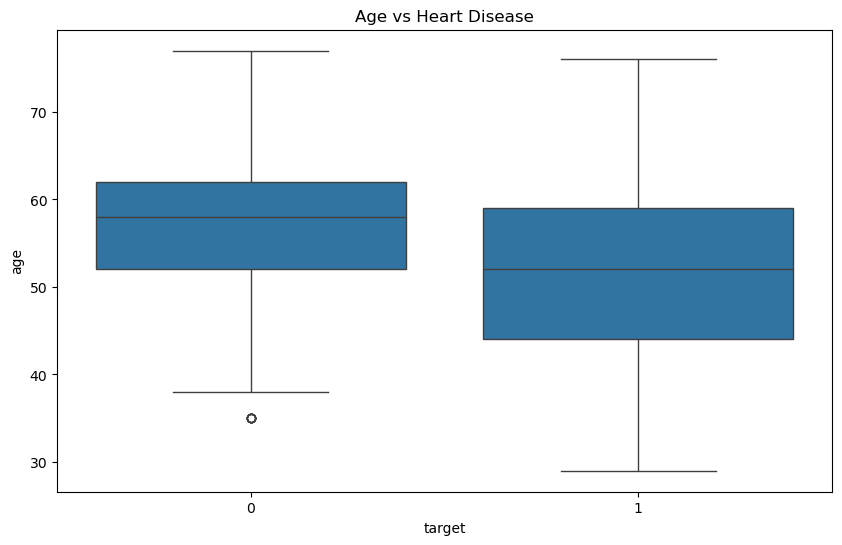

In [5]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Plot distribution of the target variable (Heart Disease)
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Plot age vs. target variable (Heart Disease)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

In [6]:
# Convert categorical features to numerical values
# For example: 'sex' and 'target' columns (if they're not already numeric)
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})
df['target'] = df['target'].map({0: 'no', 1: 'yes'})

# Convert other categorical columns to numeric using one-hot encoding or label encoding if necessary
# For simplicity, let's assume the dataset columns like 'cp', 'fbs', 'restecg', etc., are already numeric
# However, if they are not, you can use pd.get_dummies() or LabelEncoder for those columns

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.dtypes)
print(X_test.dtypes)

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object
age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object


In [14]:
# If there are categorical columns, convert them to numeric (e.g., using get_dummies)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Make sure 'X_test' is correct

In [16]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

          no       0.97      1.00      0.99       102
         yes       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



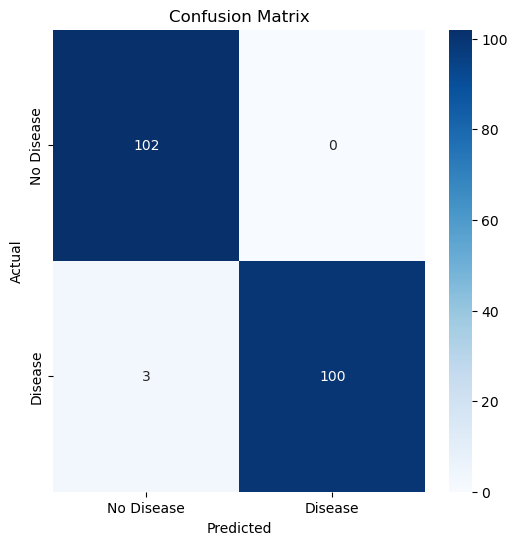

In [17]:
# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()